In [2]:
from google.colab import files
files.upload()

ModuleNotFoundError: No module named 'google'

In [3]:
import pandas as pd
df = pd.read_csv('Mall_Customers_Segmentation.csv')
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [4]:
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
import matplotlib.pyplot as plt
from numpy import where



In [6]:
!pip install numpy==1.26.4  pyyaml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 32.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [7]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.4 MB/s eta 0:00:00


In [ ]:
# Downgrade NumPy to a compatible version
!pip install numpy==1.24.4 --force-reinstall

# Reinstall scikit-learn-extra using no cache to avoid old binary
!pip install --no-cache-dir --force-reinstall scikit-learn-extra

# Restart the runtime to apply changes (this line restarts Colab)
import os
os.kill(os.getpid(), 9)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 77.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
pymc 5.21.1 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.6 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper


In [5]:
from sklearn_extra.cluster import KMedoids

model = KMedoids(n_clusters=2)
df['Cluster'] = model.fit_predict(df[['Age', 'Annual Income (k$)']])

In [6]:
label_col = 'Cluster'


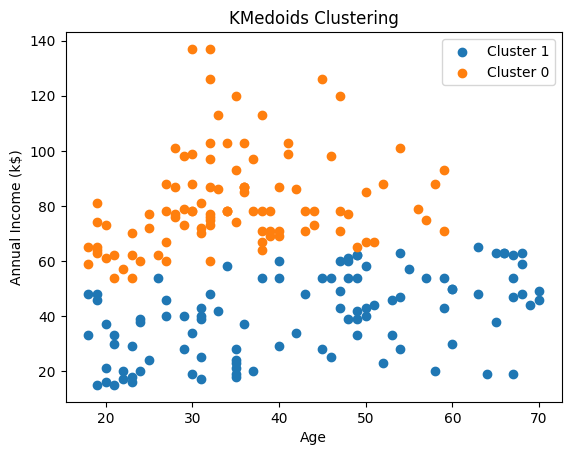

In [7]:
#Visualize the clusters (2D plot)
import matplotlib.pyplot as plt
from numpy import where

feature1 = 'Age'
feature2 = 'Annual Income (k$)'
label_col = 'Cluster'

for cluster in df[label_col].unique():
    row_ix = where(df[label_col] == cluster)
    plt.scatter(df.iloc[row_ix][feature1], df.iloc[row_ix][feature2], label=f"Cluster {cluster}")

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("KMedoids Clustering")
plt.legend()
plt.show()


In [8]:
# Evaluate clustering quality
from sklearn.metrics import silhouette_score

X = df[[feature1, feature2]]
score = silhouette_score(X, df['Cluster'])
print(f"Silhouette Score: {score:.3f}")


Silhouette Score: 0.426
